<a href="https://colab.research.google.com/github/DataBackedAfrica/Forecast_House_Prices/blob/main/forecast_house_model_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
listed_homes = []


for i in range(1, 2000):
  url= f'https://www.propertypro.ng/property-for-rent/page={i}'
  headers ={'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}
  res = requests.get(url,headers=headers)

  pro_soup = BeautifulSoup(res.content, 'html.parser')
  homes = pro_soup.find_all('div', class_='single-room-sale listings-property')
  #extract information needed from website

  for home in homes:

    # extract date
    day_ = home.find('h5').get_text(strip=True)
    days= []

    def extract_days(x):
      extract_day = x.split(',')
      length_ = len(extract_day)

      if length_ < 2:
        days.append(extract_day[0])
      else:
        days.append(extract_day[1])
      return days

    days = extract_days(day_)
    # extract date from days text
    for day in days:
      # print(day)
      ext = re.search(r"(\d{2} \w+ \d{4})", day).group(0)



    # home description is same tag h4 with location
    # description is index 0
    tag = home.find_all('h4')
    desc = tag[0].get_text()

    # location has same tag h4 name with desc
    loc = tag[1].get_text(strip=True)


    # type of apartment and price is in same h3 tag
    # type of apartment
    tag_1 = home.find_all('h3')
    type_= tag_1[0].get_text()


    # price, currency and payment type (year, monthly, sqm)
    amount = tag_1[1].get_text()
    currency = re.search(r'\$|₦', amount).group(0)
    price = re.search(r'[\d,]+', amount).group(0)
    # payment_type = re.search(r'/\w+', amount)
    # payment= np.nan if payment_type == None else payment_type.group(0).replace('/', '')


    # number of bedrooms
    span_= home.find_all('span')
    num_of_beds = []
    result= ''
    # print(span_len)
    def extract_span(x):
      span_len= len(x)

      if span_len < 7:
         result= span_[2].get_text()
      elif span_len == 7:
        result = span_[4].get_text()
      else:
        result = span_[5].get_text()

      num_of_beds.append(result)
      return result

    num_of_bed = extract_span(span_)


    # if there is an error here with the first num of beds
    # modify code with checking for span length
    # if less than 7, the span_ index for beds is in index 3
    # span_length = len(span_)

    # extract type of furnishing
    furnished_ = home.find('div', class_='furnished-btn').find_all('a')
    furnished = []
    furnishes= []
    len_fur = len(furnished_)
    [furnished.extend(list_) for list_ in furnished_ if len_fur > 0]
    def check_list(lst):
      if len(lst) == 0:
        return 'NaN'
      elif len_fur == 1:
        return furnished[0]
      else:
        return str(furnished[0]) + ' ' + '&' + ' ' + str(furnished[1])
    furnishes = check_list(furnished)

    # print(loc)
    listed_homes.append([ext, desc, type_,loc, num_of_bed, furnishes, currency, price])


In [ ]:
df= pd.DataFrame(listed_homes, columns= ['Date', 'Description', 'Type', 'Location', 'Number Of Bedrooms', 'Furnished', 'Currency','Price'])
df.tail()

,Date,Description,Type,Location,Number Of Bedrooms,Furnished,Currency,Price
99945,18 Aug 2023,2 BEDROOM FLAT / APARTMENT FOR RENT,2 Bedroom Flat,Alagomeji Yaba Lagos,2 beds,Furnished & Newly Built,₦,"2,500,000"
99946,22 Jun 2023,4 BEDROOM HOUSE FOR RENT,Luxury Serviced 4 Bedroom Terrace Duplex,Ikate Lekki Lagos,4 beds,Serviced & Newly Built,₦,"7,000,000"
99947,16 Aug 2023,3 BEDROOM HOUSE FOR RENT,Serviced 3 Bedroom Apartment,Victoria Island Lagos,3 beds,Serviced & Newly Built,₦,"15,000,000"
99948,15 Aug 2023,2 BEDROOM HOUSE FOR RENT,Serviced 2 Bedroom Apartment,"Phase 1, Lekki Lagos",2 beds,Serviced & Newly Built,₦,"7,500,000"
99949,22 Aug 2023,3 BEDROOM HOUSE FOR RENT,Luxury 3 Bedroom Apartment + Bq,Victoria Island Lagos,3 beds,Serviced & Newly Built,₦,"8,000,000"


In [ ]:
df.remove_duplicates()

In [ ]:
df.to_csv('forecast_house_pro_Data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/forecast_house_pro_Data.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,Description,Type,Location,Number Of Bedrooms,Furnished,Currency,Price
0,0,22 Jun 2023,2 BEDROOM HOUSE FOR RENT,A Nice 2 Bedroom Duplex,"Carlton Gate Estate, Akobo Gra Akobo Ibadan Oyo",2 beds,NaN,₦,"1,800,000"
1,1,24 Jun 2023,4 BEDROOM HOUSE FOR RENT,A Nice 4 Bedroom Duplex,Ikolaba Gra Bodija Ibadan Oyo,4 beds,NaN,₦,"2,500,000"
2,2,15 Aug 2023,4 BEDROOM HOUSE FOR RENT,Serviced 4 Bedroom Terraced Duplex,Ikota Lekki Lagos,4 beds,Serviced & Newly Built,₦,"3,500,000"
3,3,23 Jun 2023,5 BEDROOM HOUSE FOR RENT,Luxury 5 Bedroom Detached Duplex With Bq,Ikota Lekki Lagos,5 beds,Serviced & Newly Built,₦,"7,500,000"
4,4,14 Jul 2023,4 BEDROOM HOUSE FOR RENT,Luxury 4 Bedroom Semi Detached Duplex With Bq,Lekki Phase 1 Lekki Lagos,4 beds,Serviced & Newly Built,₦,"12,000,000"


In [ ]:
df.isnull().sum()

Unnamed: 0               0
Date                     0
Description              0
Type                     0
Location                 0
Number Of Bedrooms       0
Furnished             7996
Currency                 0
Price                    0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Price'] = df['Price'].astype(str).str.replace(',', '')

In [ ]:
df['Price'] = df['Price'].astype(int)

In [ ]:
for index, row in df.iterrows():
  if '$' in row['Currency']:
    dol_to_naira = 775.50 * int(row['Price'])
    df.loc[index, 'Price'] = dol_to_naira

In [ ]:
df['Currency'].unique()

array(['₦'], dtype=object)

In [ ]:
df['Type']= df['Type'].str.lower()

In [ ]:
for index, row in df.iterrows():
  if 'office' in row['Type'] or 'commercial' in row['Type'] or 'shop' in row['Type']:
    df.drop(index, inplace=True)

In [ ]:
# property_type = ['mini flat', 'flat', 'terrace duplex', 'apartment', 'semi detached duplex', 'detached duplex']

def clean_type(x):
    if 'terraces duplex' in x or 'terraced duplex' in x or 'terrace duplex' in x or 'terrace' in x:
      return 'terrace duplex'
    elif 'mini flat' in x or 'room and parlor' in x:
      return 'mini flat'
    elif 'flat' in x or 'flats' in x:
      return 'flat'
    elif 'self contain' in x or 'self con' in x:
      return 'self contain'
    elif 'apartment' in x and not 'shared' in x:
      return 'flat'
    elif 'shared' in x and 'apartment' in x:
      return 'shared apartment'
    elif 'maisonette' in x or 'massionette' in x:
      return 'maisonette'
    elif 'semi' in x and 'detached ' in x:
      return 'semi detached duplex'
    elif 'detached' in x and not 'semi' in x:
      return 'detached duplex'
    elif 'penthouse' in x:
      return 'penthouse'
    elif 'mansion' in x:
      return 'mansion'
    elif 'bungalow' in x:
      return 'bungalow'
    elif 'bedroom duplex' in x:
      return 'duplex'
    else:
      return x


df['Property_type']= df['Type'].map(clean_type)

In [ ]:
df['Property_type'].unique()

array(['duplex', 'terrace duplex', 'detached duplex',
       'semi detached duplex', 'flat', 'penthouse', 'maisonette',
       'mini flat', 'self contain', '6,663 sqm land'], dtype=object)

In [ ]:
pent = 0
for index, row in df.iterrows():
  if 'penthouse' in row['Type']:
    pent+=1
print(pent)

1999


In [ ]:
terrace = 0
for index, row in df.iterrows():
  if 'terrace' in row['Type'] or 'terraces' in row['Type'] or 'terraced' in row['Type']:
    terrace+=1
print(terrace)

27986


In [ ]:
detached = 0
for index, row in df.iterrows():
  if 'semi' in row['Type']:
    detached+=1
print(detached)

7996


In [ ]:
detached_ = 0
for index, row in df.iterrows():
  if 'detached' in row['Type']:
    detached_+=1
print(detached_)

20194


In [ ]:
for index, row in df.iterrows():
  if 'haap coliving furnished bq for monthly stay' in row['Property_type']:
    df.drop(index, inplace=True)

In [ ]:
self_=0

for index, row in df.iterrows():
  if 'self contain' in row['Type'] or 'self con' in row['Type']:
    self_+=1
print(self_)

3998


In [ ]:
ware = 0

for index, row in df.iterrows():
  if 'warehouse' in row['Type']:
    df.drop(index, inplace=True)

In [ ]:
for index, row in df.iterrows():
  if '1 room (sharing kitchen with just a single occupant)' in row['Type']:
    df.drop(index, inplace=True)

In [ ]:
for index, row in df.iterrows():
  if 'newly built self con for rent' in row['Property_type']:
    df.loc[index, 'Property_type'] = 'studio apartment'
    # print(row)


In [ ]:
for index, row in df.iterrows():
  if 'sqm land' in row['Property_type']:
    df.drop(index, inplace=True)

In [ ]:
share_=0

for index, row in df.iterrows():
  if 'shared apartment' in row['Type']:
    share_+=1
print(share_)

0


In [ ]:
df['Property_type'].value_counts()

flat                    33779
terrace duplex          27986
detached duplex         12198
semi detached duplex     7996
duplex                   3998
maisonette               3998
mini flat                3998
penthouse                1999
self contain             1999
Name: Property_type, dtype: int64

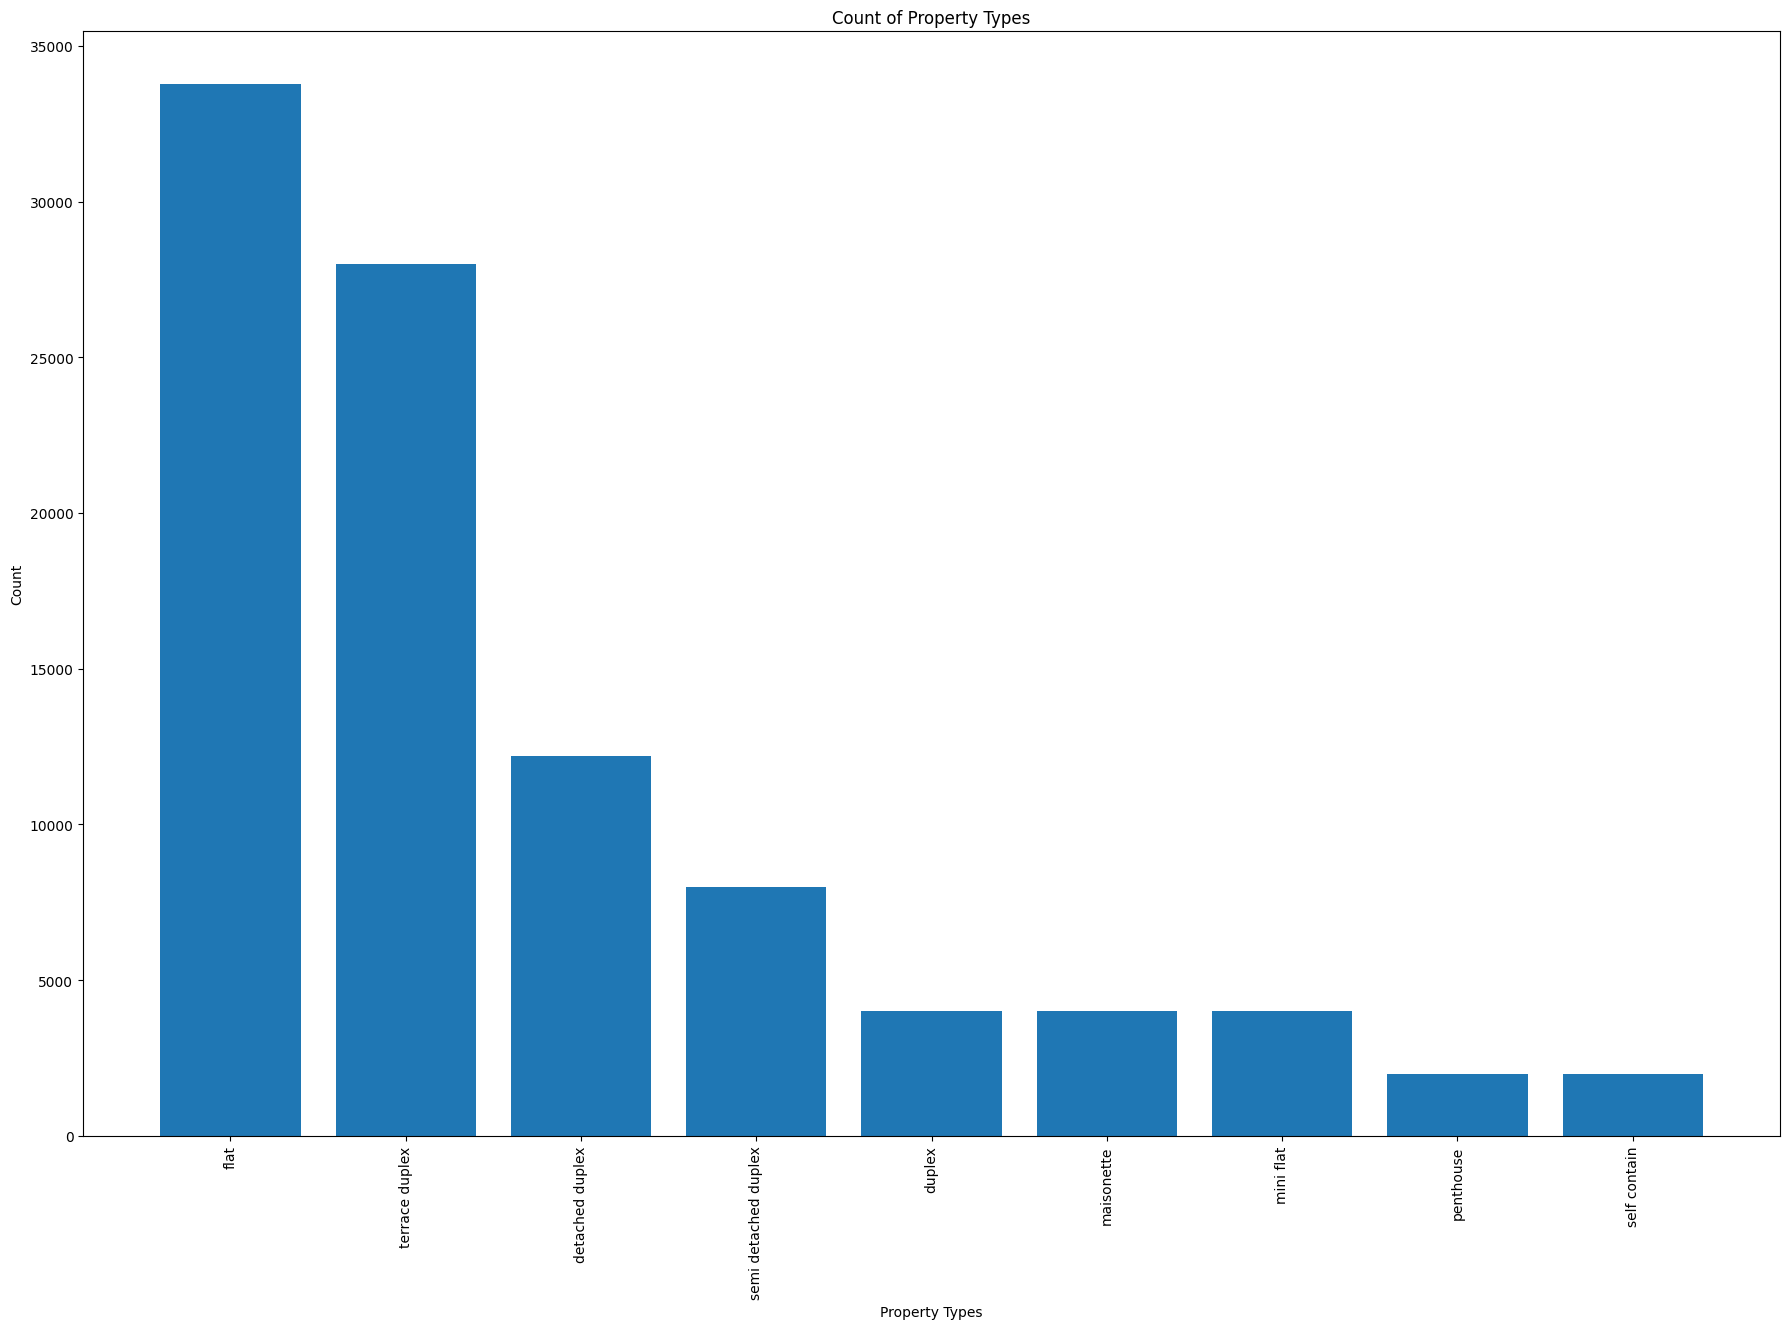

In [ ]:
plt.figure(figsize=(18,12))

property_val= df['Property_type'].value_counts()

# Create a bar plot
plt.bar(property_val.index, property_val.values)

# Set plot title and labels
plt.title('Count of Property Types')
plt.xlabel('Property Types')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
df['Number Of Bedrooms'].unique()

array(['2 beds', '4 beds', '5 beds', '1 beds', '3 beds'], dtype=object)

In [ ]:
# bed_ = 0
for index, row in df.iterrows():
  df_bed = str(row['Number Of Bedrooms'])
  match_ = re.search(r'^\d', df_bed)
  beds= 0 if match_ == None else match_.group(0)
  df.loc[index, 'Number Of Bedrooms'] = beds
  # print(beds)

In [ ]:
df['Number Of Bedrooms'].unique()

array(['2', '4', '5', '1', '3'], dtype=object)

In [ ]:
df["Number Of Bedrooms"]= df['Number Of Bedrooms'].astype(int)

In [ ]:
df.dtypes

Unnamed: 0                     int64
Date                  datetime64[ns]
Description                   object
Type                          object
Location                      object
Number Of Bedrooms             int64
Furnished                     object
Currency                      object
Price                          int64
Property_type                 object
dtype: object

In [ ]:
df['Furnished'].unique()

array([nan, 'Serviced & Newly Built', 'Serviced', 'Newly Built',
       'Furnished & Newly Built'], dtype=object)

In [ ]:
# replace nan values with non-furnished

df['Furnished'].fillna('Non-Furnished', inplace=True)

In [ ]:
df['Furnished'].unique()

array(['Non-Furnished', 'Serviced & Newly Built', 'Serviced',
       'Newly Built', 'Furnished & Newly Built'], dtype=object)

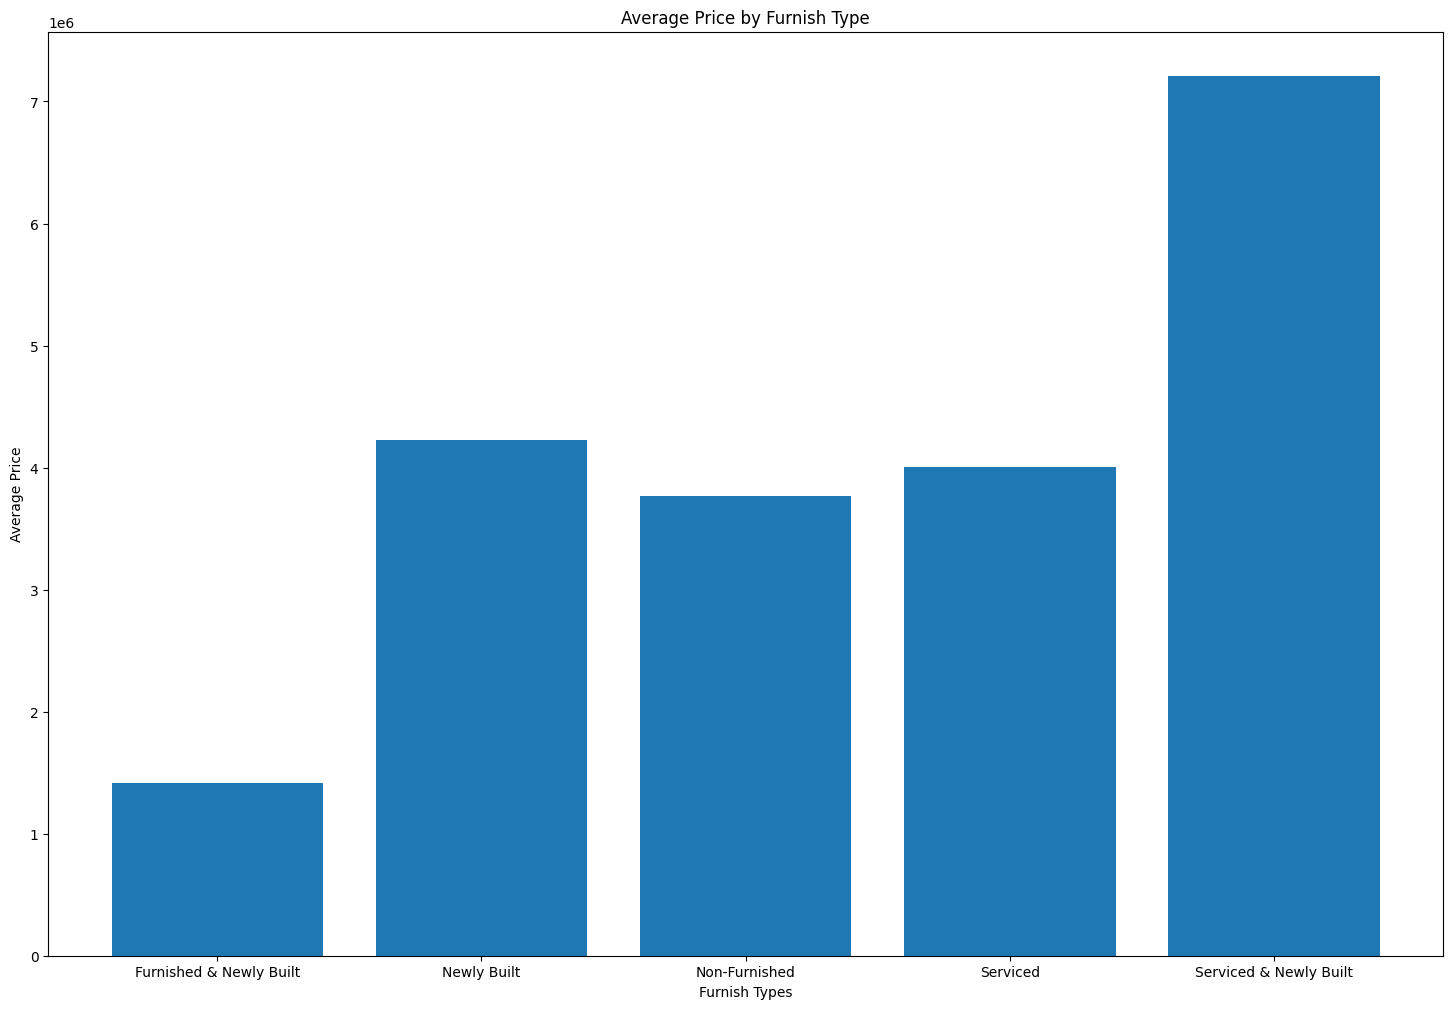

In [ ]:
# Calculate average price for each type of furnishing

plt.figure(figsize=(18,12))
average_prices = df.groupby('Furnished')['Price'].mean()

# Create a bar plot
plt.bar(average_prices.index, average_prices.values)

# Set plot title and labels
plt.title('Average Price by Furnish Type')
plt.xlabel('Furnish Types')
plt.ylabel('Average Price')

# Show the plot
plt.show()

In [ ]:
df['Location'].unique()

array(['Carlton Gate Estate, Akobo Gra Akobo Ibadan Oyo',
       'Ikolaba Gra Bodija Ibadan Oyo', 'Ikota Lekki Lagos',
       'Lekki Phase 1 Lekki Lagos', 'Ikate Lekki Lagos',
       'Chevron Toll Gate Orchid Road, Chevron Lekki Lagos',
       'Phase 1, Lekki Lagos', 'Chevron Lekki Lagos',
       'Chevron Toll Gate, Chevron Lekki Lagos', 'Ologolo Lekki Lagos',
       'Toll Gate Orchid Road Chevron Lekki Lagos',
       'Osapa London Lekki Lagos', 'Jahi Abuja', 'Ajah Lagos',
       'Chevron Toll Gate, Lekki Lagos', 'Lekki Lagos',
       'Chevron Toll Gate, Orchid Road, Chevron Lekki Lagos',
       '10 Seed School, Off Gbangbala Street, Ikate Lekki Lagos',
       'Oniru Victoria Island Lagos', 'Parkview Estate Ikoyi Lagos',
       '10 Seed School, Off Gbangbala Street, Elegushi Ikate Lekki Lagos',
       'Alagomeji Yaba Lagos', 'Iwaya Yaba Lagos',
       'Victoria Island Lagos', 'Kolapo Ishola Gra Akobo Ibadan Oyo'],
      dtype=object)

In [ ]:

location_list = ['Chevron', 'Ikate', 'Maruwa','Ikota', 'Orchid',  'Igbo Efon', 'Ologolo',
                'Osapa London', 'Agungi', 'Nicon', 'Salem', 'Ikate-Elegushi', 'Ajah', 'Thomas Estate', 'Phase 1', 'Osapa london'
                'Olokonla', 'Abijo', 'Lafiaji', 'Sangotedo', 'Idado', 'Elf',
                'Mobil','VGC', 'Vgc','Victoria Island', 'Bodije', 'Ikeja', 'Yaba',
                 'Ibeju', 'Ikoyi', 'Ikorodu', 'Lokogoma', 'Jabi', 'Wumba',
                 'Ogba', 'Surulere', 'Shomolu', 'Kaura', 'Ketu', 'Garki 1', 'Galadimawa', 'Garki 2',
                 'Maryland', 'Agege', 'Gbagada', 'Magodo', 'Merian', 'Onikolobo', 'Akala', 'Oluyole', 'Asaye', 'Iju',
                 'Gwarinpa', 'Amuwo Odofin', 'Egbeda', 'Wuse 2', 'Wuye', 'Ilasan', 'Ajah', 'Iyanganku', 'Bodija', 'Samonda', 'Akobo', 'Maitama', 'Guzape',
                 'Asokoro', 'Jabi', 'Ojodu', 'Ipaja', 'Bariga', 'Elegushi', 'Ogudu', 'Apete', 'Toll Gate', 'Apo', 'Agodi', 'Oke Afa', 'Ajao Estate', 'Awoyaya', 'Jahi']

for index, row in df.iterrows():
  for loc_ in location_list:
    if loc_ in row['Location']:
      df.loc[index, 'Loc'] = loc_



In [ ]:
df['Loc'].unique()

array(['Akobo', 'Bodija', 'Ikota', 'Phase 1', 'Ikate', 'Toll Gate',
       'Chevron', 'Ologolo', 'Osapa London', 'Jahi', 'Ajah', nan,
       'Victoria Island', 'Ikoyi', 'Elegushi', 'Yaba'], dtype=object)

In [ ]:
df['Loc'].value_counts()

Toll Gate          17991
Phase 1            15992
Ikate              13993
Victoria Island     9542
Chevron             8200
Yaba                5997
Ikota               3998
Ologolo             3998
Osapa London        3998
Akobo               2248
Bodija              1999
Jahi                1999
Ajah                1999
Ikoyi               1999
Elegushi            1999
Name: Loc, dtype: int64

In [ ]:
for index, row in df.iterrows():
  if 'Lekki Lagos' == row['Location']:
    df.loc[index, 'Loc'] = 'Lekki'

In [ ]:
df['Loc'].isnull().sum()

0

In [ ]:
# rows_with_null = df[df['Loc'].isnull()]

# print(rows_with_null)


In [ ]:
for index, row in df.iterrows():
  if 'Toll Gate' in row['Loc'] and 'Orchid' in row['Location']:
    df.loc[index, 'Loc'] = 'Orchid'
    # print(toll_split)

In [ ]:
for index, row in df.iterrows():
  if 'Toll Gate' in row['Loc'] and 'Orchid' not in row['Location']:
    toll_split = row['Location'].split(" ")
    df.loc[index, 'Loc'] = 'Chevron'

In [ ]:
for index, row in df.iterrows():
  if 'Yaba' in row['Loc']:
    yaba_split = row['Location'].split(" ")[0]
    df.loc[index, 'Loc'] = yaba_split
    # print(yaba_split)

In [ ]:
for index, row in df.iterrows():
  if 'Phase 1' in row['Loc']:
    df.loc[index, 'Loc'] = 'Phase 1, Lekki'

In [ ]:
for index, row in df.iterrows():
  if 'Ikate' in row['Loc']:
    df.loc[index, 'Loc'] = 'Ikate Lekki'

In [ ]:
df['Loc'].value_counts()

Chevron            18195
Phase 1, Lekki     15992
Ikate Lekki        13993
Victoria Island     9542
Orchid              7996
Osapa London        3998
Ikota               3998
Ologolo             3998
Alagomeji           3998
Akobo               2248
Ajah                1999
Lekki               1999
Jahi                1999
Ikoyi               1999
Elegushi            1999
Bodija              1999
Iwaya               1999
Name: Loc, dtype: int64

In [ ]:
df['Loc'].isnull().sum()

0

In [ ]:
df.head()

,Unnamed: 0,Date,Description,Type,Location,Number Of Bedrooms,Furnished,Currency,Price,Property_type,Loc
0,0,2023-06-22,2 BEDROOM HOUSE FOR RENT,a nice 2 bedroom duplex,"Carlton Gate Estate, Akobo Gra Akobo Ibadan Oyo",2,Non-Furnished,₦,1800000,duplex,Akobo
1,1,2023-06-24,4 BEDROOM HOUSE FOR RENT,a nice 4 bedroom duplex,Ikolaba Gra Bodija Ibadan Oyo,4,Non-Furnished,₦,2500000,duplex,Bodija
2,2,2023-08-15,4 BEDROOM HOUSE FOR RENT,serviced 4 bedroom terraced duplex,Ikota Lekki Lagos,4,Serviced & Newly Built,₦,3500000,terrace duplex,Ikota
3,3,2023-06-23,5 BEDROOM HOUSE FOR RENT,luxury 5 bedroom detached duplex with bq,Ikota Lekki Lagos,5,Serviced & Newly Built,₦,7500000,detached duplex,Ikota
4,4,2023-07-14,4 BEDROOM HOUSE FOR RENT,luxury 4 bedroom semi detached duplex with bq,Lekki Phase 1 Lekki Lagos,4,Serviced & Newly Built,₦,12000000,semi detached duplex,"Phase 1, Lekki"


In [ ]:
for index, row in df.iterrows():
  df_loc= str(row['Location'])
  df_split= row['Location'].split(' ')[-1]
  df.loc[index, 'State'] = df_split

In [ ]:
df['State'].unique()

array(['Oyo', 'Lagos', 'Abuja'], dtype=object)

In [ ]:
df.head()

,Unnamed: 0,Date,Description,Type,Location,Number Of Bedrooms,Furnished,Currency,Price,Property_type,Loc,State
0,0,2023-06-22,2 BEDROOM HOUSE FOR RENT,a nice 2 bedroom duplex,"Carlton Gate Estate, Akobo Gra Akobo Ibadan Oyo",2,Non-Furnished,₦,1800000,duplex,Akobo,Oyo
1,1,2023-06-24,4 BEDROOM HOUSE FOR RENT,a nice 4 bedroom duplex,Ikolaba Gra Bodija Ibadan Oyo,4,Non-Furnished,₦,2500000,duplex,Bodija,Oyo
2,2,2023-08-15,4 BEDROOM HOUSE FOR RENT,serviced 4 bedroom terraced duplex,Ikota Lekki Lagos,4,Serviced & Newly Built,₦,3500000,terrace duplex,Ikota,Lagos
3,3,2023-06-23,5 BEDROOM HOUSE FOR RENT,luxury 5 bedroom detached duplex with bq,Ikota Lekki Lagos,5,Serviced & Newly Built,₦,7500000,detached duplex,Ikota,Lagos
4,4,2023-07-14,4 BEDROOM HOUSE FOR RENT,luxury 4 bedroom semi detached duplex with bq,Lekki Phase 1 Lekki Lagos,4,Serviced & Newly Built,₦,12000000,semi detached duplex,"Phase 1, Lekki",Lagos


In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0            0
Date                  0
Description           0
Type                  0
Location              0
Number Of Bedrooms    0
Furnished             0
Currency              0
Price                 0
Property_type         0
Loc                   0
State                 0
dtype: int64

In [ ]:
df.drop_duplicates()

,Unnamed: 0,Date,Description,Type,Location,Number Of Bedrooms,Furnished,Currency,Price,Property_type,Loc,State
0,0,2023-06-22,2 BEDROOM HOUSE FOR RENT,a nice 2 bedroom duplex,"Carlton Gate Estate, Akobo Gra Akobo Ibadan Oyo",2,Non-Furnished,₦,1800000,duplex,Akobo,Oyo
1,1,2023-06-24,4 BEDROOM HOUSE FOR RENT,a nice 4 bedroom duplex,Ikolaba Gra Bodija Ibadan Oyo,4,Non-Furnished,₦,2500000,duplex,Bodija,Oyo
2,2,2023-08-15,4 BEDROOM HOUSE FOR RENT,serviced 4 bedroom terraced duplex,Ikota Lekki Lagos,4,Serviced & Newly Built,₦,3500000,terrace duplex,Ikota,Lagos
3,3,2023-06-23,5 BEDROOM HOUSE FOR RENT,luxury 5 bedroom detached duplex with bq,Ikota Lekki Lagos,5,Serviced & Newly Built,₦,7500000,detached duplex,Ikota,Lagos
4,4,2023-07-14,4 BEDROOM HOUSE FOR RENT,luxury 4 bedroom semi detached duplex with bq,Lekki Phase 1 Lekki Lagos,4,Serviced & Newly Built,₦,12000000,semi detached duplex,"Phase 1, Lekki",Lagos
...,...,...,...,...,...,...,...,...,...,...,...,...
99945,99945,2023-08-18,2 BEDROOM FLAT / APARTMENT FOR RENT,2 bedroom flat,Alagomeji Yaba Lagos,2,Furnished & Newly Built,₦,2500000,flat,Alagomeji,Lagos
99946,99946,2023-06-22,4 BEDROOM HOUSE FOR RENT,luxury serviced 4 bedroom terrace duplex,Ikate Lekki Lagos,4,Serviced & Newly Built,₦,7000000,terrace duplex,Ikate Lekki,Lagos
99947,99947,2023-08-16,3 BEDROOM HOUSE FOR RENT,serviced 3 bedroom apartment,Victoria Island Lagos,3,Serviced & Newly Built,₦,15000000,flat,Victoria Island,Lagos
99948,99948,2023-08-15,2 BEDROOM HOUSE FOR RENT,serviced 2 bedroom apartment,"Phase 1, Lekki Lagos",2,Serviced & Newly Built,₦,7500000,flat,"Phase 1, Lekki",Lagos


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:

le_furnished= LabelEncoder()
df['Furnished'] = le_furnished.fit_transform(df['Furnished'])


In [ ]:
le_pro = LabelEncoder()

df['Property_type'] = le_pro.fit_transform(df['Property_type'])

In [ ]:

le_loc = LabelEncoder()
df['Loc'] = le_loc.fit_transform(df['Loc'])

In [ ]:
le_state= LabelEncoder()
df['State']= le_state.fit_transform(df['State'])

In [ ]:
df.head()

,Unnamed: 0,Date,Description,Type,Location,Number Of Bedrooms,Furnished,Currency,Price,Property_type,Loc,State
0,0,2023-06-22,2 BEDROOM HOUSE FOR RENT,a nice 2 bedroom duplex,"Carlton Gate Estate, Akobo Gra Akobo Ibadan Oyo",2,2,₦,1800000,1,1,2
1,1,2023-06-24,4 BEDROOM HOUSE FOR RENT,a nice 4 bedroom duplex,Ikolaba Gra Bodija Ibadan Oyo,4,2,₦,2500000,1,3,2
2,2,2023-08-15,4 BEDROOM HOUSE FOR RENT,serviced 4 bedroom terraced duplex,Ikota Lekki Lagos,4,4,₦,3500000,8,7,1
3,3,2023-06-23,5 BEDROOM HOUSE FOR RENT,luxury 5 bedroom detached duplex with bq,Ikota Lekki Lagos,5,4,₦,7500000,0,7,1
4,4,2023-07-14,4 BEDROOM HOUSE FOR RENT,luxury 4 bedroom semi detached duplex with bq,Lekki Phase 1 Lekki Lagos,4,4,₦,12000000,7,15,1


In [ ]:
df['ts'] = df.Date.values.astype(np.int64) // 10 ** 9
df.head()

,Unnamed: 0,Date,Description,Type,Location,Number Of Bedrooms,Furnished,Currency,Price,Property_type,Loc,State,ts
0,0,2023-06-22,2 BEDROOM HOUSE FOR RENT,a nice 2 bedroom duplex,"Carlton Gate Estate, Akobo Gra Akobo Ibadan Oyo",2,2,₦,1800000,1,1,2,1687392000
1,1,2023-06-24,4 BEDROOM HOUSE FOR RENT,a nice 4 bedroom duplex,Ikolaba Gra Bodija Ibadan Oyo,4,2,₦,2500000,1,3,2,1687564800
2,2,2023-08-15,4 BEDROOM HOUSE FOR RENT,serviced 4 bedroom terraced duplex,Ikota Lekki Lagos,4,4,₦,3500000,8,7,1,1692057600
3,3,2023-06-23,5 BEDROOM HOUSE FOR RENT,luxury 5 bedroom detached duplex with bq,Ikota Lekki Lagos,5,4,₦,7500000,0,7,1,1687478400
4,4,2023-07-14,4 BEDROOM HOUSE FOR RENT,luxury 4 bedroom semi detached duplex with bq,Lekki Phase 1 Lekki Lagos,4,4,₦,12000000,7,15,1,1689292800


In [ ]:
df.drop(columns=['Unnamed: 0','Date', 'Description', 'Type', 'Location', 'Currency'], inplace=True)

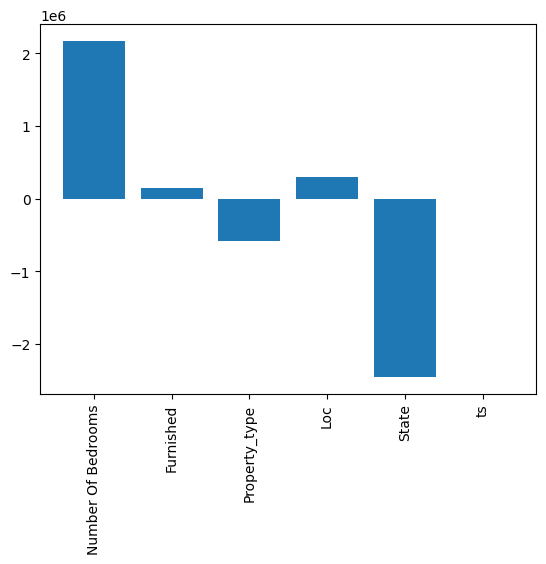

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
X= df.drop("Price", axis=1).values
y = df["Price"].values

names = df.drop("Price", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef= lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.drop(columns=['State'], inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from copy import deepcopy
import numpy as np
import pandas as pd
from datetime import datetime

best_fit={}

class RandomForestARModel():
        # input randomized search to define the parameters that work
    # best_fit={}

    def random_forest_tuning(X_train, y_train):

        model = RandomForestRegressor()
        grid = {'n_estimators': [100, 200, 300, 400],
              'max_depth': [2, 5, 8],
              'max_features': ['sqrt', 'log2'],
              'random_state': [42]}
        random= RandomizedSearchCV(model, grid, cv=2)
        random.fit(X_train, y_train)
        best_fit= (random.best_params_)
        return best_fit

    def __init__(self, best_fit, n_lags=1, random_state=42):
        self.n_lags = n_lags
        self.model = RandomForestRegressor(**best_fit)

    def fit(self, X_train, y_train):
        train_df = pd.DataFrame(X_train)
        self.train_df = deepcopy(train_df)

        Xtrain = pd.concat([train_df.shift(t) for t in range(1, self.n_lags + 1)], axis=1).dropna()
        self.Xtrain = Xtrain

        y_df = pd.DataFrame(y_train)
        ytrain = y_df.loc[Xtrain.index,:]
        self.ytrain = ytrain

        self.model.fit(Xtrain, ytrain.values.ravel())
        return self.model

    def sample_forecast(self,X_test, n_periods, n_samples, random_state):
        n_samples = best_fit['n_estimators']
        random_state = best_fit['random_state']
        samples = self._perform_forecast(n_periods, n_samples, random_state )
        output = self._retransform_forecast(samples, n_periods)
        return output

    def _perform_forecast(self, n_periods, n_samples, random_state):
        samples = []
        n_samples = best_fit['n_estimators']
        random_state = best_fit['random_state']
        # test_df = pd.DataFrame(X_test)
        # self.test_df = deepcopy(test_df)
        # X_test_lagged = pd.concat([test_df.shift(t) for t in range(1, self.n_lags + 1)], axis=1).dropna()

        # y_test = pd.DataFrame(y_test)
        # ytest = y_test.loc[X_test_lagged.index,:]


        np.random.seed(random_state)

        for i in range(n_samples):

           Xf = np.concatenate([self.Xtrain.iloc[-1,1:].values.reshape(1,-1),
                                 self.ytrain.iloc[-1].values.reshape(1,1)],1)
           forecasts = []

           for t in range(n_periods):
                tree = self.model.estimators_[np.random.randint(len(self.model.estimators_))]
                pred = tree.predict(Xf)[0]
                forecasts.append(pred)

                Xf = np.concatenate([Xf[:, 1:], np.array([[pred]])], 1)
                samples.append(forecasts)

        return samples

    def _retransform_forecast(self, samples, n_periods):
        full_sample_tree = []

        for samp in samples:
            draw = np.array(samp)
            result = draw

            full_sample_tree.append(result.reshape(-1, 1))

        return np.concatenate(full_sample_tree, 1)

n_periods = 1
# today = datetime.now().date()

# # next_month = today.replace(month=today.month + 3)
# timestamp_mon = int(datetime.combine(today, datetime.min.time()).timestamp())
# X_mon = np.array([[5, 'terrace duplex', 'Chevron Lekki', timestamp_mon]])
# X_mon[:, 1] = le_pro.transform(X_mon[:, 1])
# X_mon[:, 2] = le_loc.transform(X_mon[:, 2])
# X_mon = X_mon.astype(int)

best_fit = RandomForestARModel.random_forest_tuning(X_train, y_train)
model = RandomForestARModel(best_fit, n_lags=3)
model.fit(X_train,y_train)
random_state = best_fit['random_state']
n_sample = best_fit['n_estimators']
forecast_samples = model.sample_forecast(X_test, n_periods,n_sample, random_state)
print(best_fit)
print(forecast_samples)


[[ 6007246.37681159  5376923.07692308  5540853.65853659  6246263.34519573
   5407142.85714286  6641666.66666667  7527272.72727273  6007246.37681159
   7000000.          6895833.33333333  5674720.67039106  2466666.66666667
   7855594.40559441 11900000.         11500000.          4100000.
   6076775.7809157   6105545.70777412  1100000.          5508333.33333333
   5914512.71186441  5986384.97652582  6161670.23554604  3000000.
   6509609.12052117  6169583.33333333  1800000.          4404347.82608696
   6435581.39534884  6187804.87804878  6303125.          6400000.
   6180532.44592346  6300012.63200445  6000000.          5540853.65853659
   8725675.67567568  7147765.36312849  5766539.44020356  6645283.01886792
   6368834.79648843  5780000.          8147530.86419753  6076775.7809157
   6000888.58509911  8248529.41176471  7527272.72727273  7921875.
   7125395.03386005  6281666.66666667  6213551.40186916  7580597.01492537
   5932290.18492176  9711111.11111111  6169163.7630662   5926923.076923

In [ ]:
from dateutil.relativedelta import relativedelta


today = datetime.now().date()
# today_year = today.year
# today_month = today.month
# today_day = today.day
# d_day = datetime(today_year, today_month, today_day)

# next = today + relativedelta(months=3)
# next_year = next.year
# next_mon = next.month
# next_day = next.day
# future = datetime(next_year, next_mon, next_day)
# difference = future - d_day
# n_periods = difference.days - 1

timestamp_mon = int(datetime.combine(next, datetime.min.time()).timestamp())
X_mon = np.array([[5, 'Serviced & Newly Built', 'terrace duplex', 'Chevron', timestamp_mon]])
X_mon[:, 1] = le_furnished.transform(X_mon[:,1])
X_mon[:, 2] = le_pro.transform(X_mon[:, 2])
X_mon[:, 3] = le_loc.transform(X_mon[:, 3])
X_mon = X_mon.astype(int)
n_periods= 90

forecast_three = model.sample_forecast(X_mon, n_periods,n_sample, random_state)
means_three = np.mean(forecast_three,axis = 1)
lowers_ = np.quantile(forecast_three,0.05,1)
uppers_ = np.quantile(forecast_three,0.95,1)

# print(forecast_[0])
print(np.mean((means_three)))
print(min(lowers_))
print(max(uppers_))
print(n_periods)

rmse_three = np.sqrt(np.mean((forecast_three - means_three[:, np.newaxis])**2, axis=0))
print(np.mean(rmse_three))

# mean for today
# mean in 90 dates
# mean in 30 days
# mean in 60 days
# train and test date
# rmse result
# each mean value for

6621465.29099664
1800000.0
12721428.571427949
90
2690319.4223500732


In [ ]:
today = datetime.now().date()
today_year = today.year
today_month = today.month
today_day = today.day
d_day = datetime(today_year, today_month, today_day)

next = today + relativedelta(months=2)
next_year = next.year
next_mon = next.month
next_day = next.day
future = datetime(next_year, next_mon, next_day)
difference = future - d_day
n_periods = difference.days - 1

timestamp_mon = int(datetime.combine(next, datetime.min.time()).timestamp())
X_mon = np.array([[5, 'Serviced & Newly Built', 'terrace duplex', 'Chevron', timestamp_mon]])
X_mon[:, 1] = le_furnished.transform(X_mon[:,1])
X_mon[:, 2] = le_pro.transform(X_mon[:, 2])
X_mon[:, 3] = le_loc.transform(X_mon[:, 3])
X_mon = X_mon.astype(int)


forecast_two = model.sample_forecast(X_mon, n_periods,n_sample, random_state)
means_two = np.mean(forecast_two,1)
lowers_ = np.quantile(forecast_two,0.05,1)
uppers_ = np.quantile(forecast_two,0.95,1)

# print(forecast_two)
print(np.mean((means_two)))
print(min(lowers_))
print(max(uppers_))
print(n_periods)

6597465.0368674565
1825000.0
12714285.714285715
60


In [ ]:
today = datetime.now().date()
today_year = today.year
today_month = today.month
today_day = today.day
d_day = datetime(today_year, today_month, today_day)

next = today + relativedelta(months=1)
next_year = next.year
next_mon = next.month
next_day = next.day
future = datetime(next_year, next_mon, next_day)
difference = future - d_day
n_periods = difference.days

timestamp_mon = int(datetime.combine(next, datetime.min.time()).timestamp())
X_mon = np.array([[5, 'Serviced & Newly Built', 'terrace duplex', 'Chevron', timestamp_mon]])
X_mon[:, 1] = le_furnished.transform(X_mon[:,1])
X_mon[:, 2] = le_pro.transform(X_mon[:, 2])
X_mon[:, 3] = le_loc.transform(X_mon[:, 3])
X_mon = X_mon.astype(int)


forecast_ = model.sample_forecast(X_mon, n_periods,n_sample, random_state)
means_one = np.mean(forecast_,1)
lowers_ = np.quantile(forecast_,0.05,1)
uppers_ = np.quantile(forecast_,0.95,1)
rmse_one = np.sqrt(np.mean((forecast_ - means_one[:, np.newaxis])**2, axis=0))

# print(forecast_[0])
print(np.mean((means_one)))
print(min(lowers_))
print(max(uppers_))
print(n_periods)
print(np.mean(rmse_one))

6570683.716229881
1800000.0
12372619.047618987
30
2491381.6822631145
